# House Prices Data Cleaning & Preprocessing

In [1]:
import importlib
import sys
import subprocess

def install_if_missing(packages):
    """Checks for missing packages and installs them if necessary."""
    for package in packages:
        try:
            importlib.import_module(package)  # Try importing the package
        except ImportError:
            print(f"🔍 {package} not found. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} installed successfully!")
            continue
        print(f"✅ {package} is already installed!")

# List of required packages
required_packages = ["matplotlib", "pandas", "numpy", "seaborn"]

# Run the function
install_if_missing(required_packages)


✅ matplotlib is already installed!
✅ pandas is already installed!
✅ numpy is already installed!
✅ seaborn is already installed!


## **1. Importing Libraries**

In [2]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

print("✅ All necessary libraries are installed and imported.")

✅ All necessary libraries are installed and imported.


## **2. Load the Dataset**

In [3]:
# determines if the notebook is open in colab
def is_colab():
    return importlib.util.find_spec("google.colab") is not None

if is_colab():
    print("\n✅ Running in Google Colab\n")
    # mount google drive
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    # set the path for the dataset
    path = "/content/drive/MyDrive/601-Group/Project/"

    # Reading data from csv to pandas dataframe
    data = "Computer_Assisted_Mass_Appraisal_-_Residential.csv"
    location_data = "Address_Points.csv"
    df = pd.read_csv(path+data)
    df_location_data = pd.read_csv(path+location_data)
else:
    print("❌ Not running in Google Colab")
    # Reading data from csv to pandas dataframe
    data = "Computer_Assisted_Mass_Appraisal_-_Residential.csv"
    location_data = "Address_Points.csv"
    df = pd.read_csv(data)
    df_location_data = pd.read_csv(location_data)

# create a constant dataframe of the original data to prevent data loss
DF_RAW = df.copy()

print("\n✅ Data Loaded\n")


✅ Running in Google Colab

Mounted at /content/drive


<ipython-input-3-c149cc0862f8>:17: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_location_data = pd.read_csv(path+location_data)



✅ Data Loaded



## **3. Shape of the Dataset**

In [4]:
rows, cols = df.shape
print(f"\nDataset contains {rows} rows and {cols} columns.\n")


Dataset contains 108848 rows and 39 columns.



## **4. Data Overview**

In [5]:
# Display basic information about the dataset
print("\n--- First Five Rows ---\n")
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.options.display.float_format = '{:,.2f}'.format # Displays in common format

display(df.head())
print("\n--- Dataset Overview ---\n")
print(df.info())


--- First Five Rows ---



,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STYLE_D,STRUCT,STRUCT_D,GRADE,GRADE_D,CNDTN,CNDTN_D,EXTWALL,EXTWALL_D,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,OBJECTID
0,0016 0099,3.00,1.00,7.00,Warm Cool,Y,1.00,6.00,2.00,"1,957.00","2,003.00",1981,2.00,2017/07/19 04:00:00+00,"1,340,000.00",Q,2,1572,1,4.00,2 Story,6.00,Row End,5.00,Good Quality,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,2.00,2.00,11,1549,2025/01/17 10:16:46+00,142112268
1,0016 0106,3.00,1.00,8.00,Ht Pump,Y,1.00,10.00,3.00,"1,959.00","2,015.00",1998,2.00,2022/08/25 04:00:00+00,"1,655,000.00",Q,4,1530,1,4.00,2 Story,7.00,Row Inside,6.00,Very Good,5.00,Very Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,2.00,11,1856,2025/01/17 10:16:46+00,142112269
2,0016 0107,3.00,1.00,7.00,Warm Cool,Y,1.00,7.00,3.00,"2,002.00",NaN,2009,2.00,2004/10/20 04:00:00+00,"920,000.00",Q,1,1600,1,4.00,2 Story,1.00,Single,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,1.00,12,1487,2025/01/17 10:16:46+00,142112270
3,0016 0108,1.00,1.00,13.00,Hot Water Rad,N,1.00,9.00,4.00,"1,900.00",NaN,1976,2.00,2013/02/08 05:00:00+00,0.00,U,1,1176,1,4.00,2 Story,7.00,Row Inside,5.00,Good Quality,4.00,Good,17.00,Stone,2.00,Built Up,6.00,Hardwood,1.00,0.00,11,962,2025/01/17 10:16:46+00,142112271
4,0016 0109,1.00,0.00,1.00,Forced Air,Y,1.00,10.00,2.00,"1,900.00","2,005.00",1974,2.00,2016/05/11 04:00:00+00,0.00,U,3,958,1,4.00,2 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,2.00,2.00,11,672,2025/01/17 10:16:46+00,142112272



--- Dataset Overview ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108848 entries, 0 to 108847
Data columns (total 39 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SSL                108848 non-null  object 
 1   BATHRM             107368 non-null  float64
 2   HF_BATHRM          107368 non-null  float64
 3   HEAT               107368 non-null  float64
 4   HEAT_D             107368 non-null  object 
 5   AC                 107368 non-null  object 
 6   NUM_UNITS          107368 non-null  float64
 7   ROOMS              107305 non-null  float64
 8   BEDRM              107354 non-null  float64
 9   AYB                108821 non-null  float64
 10  YR_RMDL            57454 non-null   float64
 11  EYB                108848 non-null  int64  
 12  STORIES            107197 non-null  float64
 13  SALEDATE           108848 non-null  object 
 14  PRICE              96854 non-null   float64
 15  QUALIFIED          10884

## **5. Checking for Missing Values**

In [6]:
print("\n--- Zero Values ---\n")
display(df.isnull().sum())
print("\n--- Missing Values ---\n")
display(df.isna().sum())


--- Zero Values ---



,0
SSL,0
BATHRM,1480
HF_BATHRM,1480
HEAT,1480
HEAT_D,1480
AC,1480
NUM_UNITS,1480
ROOMS,1543
BEDRM,1494
AYB,27



--- Missing Values ---



,0
SSL,0
BATHRM,1480
HF_BATHRM,1480
HEAT,1480
HEAT_D,1480
AC,1480
NUM_UNITS,1480
ROOMS,1543
BEDRM,1494
AYB,27


## **6. Handling Missing Values**

In [7]:
# Handles missing values in only 'price' column
df = df.dropna(subset=['PRICE'])  # Remove NaN values
df = df[df['PRICE'] != 0]  # Remove rows where price is 0

# Handles missing values in only 'landarea' column
df = df.dropna(subset=['LANDAREA'])  # Remove NaN values
df = df[df['LANDAREA'] != 0]  # Remove rows where price is 0

# Re-evaluate the shape of the data
rows, cols = df.shape
print(f"\nDataset contains {rows} rows and {cols} columns.\n")


Dataset contains 63646 rows and 39 columns.



## **7. Checking for Duplicates**

In [8]:
duplicates = df.duplicated().sum()
print(f"\n--- Duplicates Found: {duplicates} ---\n")
df = df.drop_duplicates()


--- Duplicates Found: 0 ---



## **7. Standardizing Column Names**

In [9]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

## **8. Encoding Categorical Variables**

In [10]:
# Print Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\n--- Categorical Columns ---\n")
for att in categorical_columns:
    print(f"{att}")

# Print quantitative columns
quantitative_columns = df.select_dtypes(include=['number']).columns
print("\n--- Quantitative Columns ---\n")
for att in quantitative_columns:
    print(f"{att}")

# Print the number of each cat & quant
print(f"\n There is {len(categorical_columns)} categorical attributes and {len(quantitative_columns)} quantitative attributes.\n")

# Print summary for each
print("\n--- Summary for each Quantitative Attribute ---\n")
df.describe(include=['number'])

# df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


--- Categorical Columns ---

ssl
heat_d
ac
saledate
qualified
style_d
struct_d
grade_d
cndtn_d
extwall_d
roof_d
intwall_d
gis_last_mod_dttm

--- Quantitative Columns ---

bathrm
hf_bathrm
heat
num_units
rooms
bedrm
ayb
yr_rmdl
eyb
stories
price
sale_num
gba
bldg_num
style
struct
grade
cndtn
extwall
roof
intwall
kitchens
fireplaces
usecode
landarea
objectid

 There is 13 categorical attributes and 26 quantitative attributes.


--- Summary for each Quantitative Attribute ---



,bathrm,hf_bathrm,heat,num_units,rooms,bedrm,ayb,yr_rmdl,eyb,stories,price,sale_num,gba,bldg_num,style,struct,grade,cndtn,extwall,roof,intwall,kitchens,fireplaces,usecode,landarea,objectid
count,"62,530.00","62,530.00","62,530.00","62,530.00","62,494.00","62,522.00","63,632.00","39,816.00","63,646.00","62,401.00","63,646.00","63,646.00","63,646.00","63,646.00","62,530.00","62,530.00","62,530.00","62,530.00","62,530.00","62,530.00","62,530.00","62,529.00","62,528.00","63,646.00","63,646.00","63,646.00"
mean,2.35,0.68,6.32,1.21,7.52,3.51,"1,935.41","2,009.38","1,942.56",2.10,"757,576.55",2.65,"1,713.47",1.00,4.42,5.10,4.31,3.87,13.50,3.91,6.28,1.26,0.63,13.37,"3,108.02","142,327,758.44"
std,1.11,0.60,5.12,0.61,2.40,1.17,72.78,93.65,259.91,0.49,"827,842.45",1.79,877.73,0.03,1.60,2.82,1.39,0.79,4.12,3.33,1.99,0.63,0.91,4.30,"3,061.34","31,727.18"
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,"142,112,268.00"
25%,2.00,0.00,1.00,1.00,6.00,3.00,"1,914.00","2,005.00","1,967.00",2.00,"325,000.00",1.00,"1,198.00",1.00,4.00,1.00,3.00,3.00,14.00,1.00,6.00,1.00,0.00,11.00,"1,499.00","142,299,593.75"
50%,2.00,1.00,7.00,1.00,7.00,3.00,"1,931.00","2,012.00","1,973.00",2.00,"597,745.00",2.00,"1,504.00",1.00,4.00,7.00,4.00,4.00,14.00,2.00,6.00,1.00,0.00,12.00,"2,175.00","142,327,791.50"
75%,3.00,1.00,13.00,1.00,8.00,4.00,"1,949.00","2,018.00","1,983.00",2.00,"933,000.00",4.00,"1,994.00",1.00,4.00,7.00,5.00,4.00,14.00,6.00,6.00,1.00,1.00,13.00,"3,909.75","142,355,637.75"
max,24.00,12.00,13.00,12.00,37.00,24.00,"2,025.00","20,222.00","2,025.00",25.00,"25,100,000.00",17.00,"16,982.00",3.00,99.00,8.00,12.00,6.00,24.00,15.00,11.00,13.00,13.00,83.00,"187,301.00","142,382,816.00"


## **9. Feature Engineering (Example: Price per Square Foot)**

In [11]:
if 'price' in df.columns and 'landarea' in df.columns:
    df['price_per_sqft'] = df['price'] / df['landarea']

    # Print the first five rows including 'price_per_sqft'
    print(df[['price', 'landarea', 'price_per_sqft']].head(),end='\n\n\n')

    # prints description of price_per_sqft
    print(df['price_per_sqft'].describe())

    average_price_per_sqft = df['price_per_sqft'].mean()
    print(f"\nAverage Price Per Sqft: ${average_price_per_sqft:.2f}")

# extract year/month/day/weekday
df['saledate'] = pd.to_datetime(df['saledate'])

df['saleyear'] = df['saledate'].dt.year        # Extract Year
df['salemonth'] = df['saledate'].dt.month      # Extract Month
df['saleday'] = df['saledate'].dt.day         # Extract Day
df['saletime'] = df['saledate'].dt.time       # Extract Time (hh:mm:ss)
df['saleweekday'] = df['saledate'].dt.weekday   # 0 = Monday, 6 = Sunday

display(df.head(10))

         price  landarea  price_per_sqft
0 1,340,000.00      1549          865.07
1 1,655,000.00      1856          891.70
2   920,000.00      1487          618.70
5   845,000.00       730        1,157.53
6   975,000.00      1598          610.14


count      63,646.00
mean        1,497.24
std        34,020.83
min             0.00
25%           112.85
50%           230.49
75%           492.77
max     2,066,666.67
Name: price_per_sqft, dtype: float64

Average Price Per Sqft: $1497.24


,ssl,bathrm,hf_bathrm,heat,heat_d,ac,num_units,rooms,bedrm,ayb,yr_rmdl,eyb,stories,saledate,price,qualified,sale_num,gba,bldg_num,style,style_d,struct,struct_d,grade,grade_d,cndtn,cndtn_d,extwall,extwall_d,roof,roof_d,intwall,intwall_d,kitchens,fireplaces,usecode,landarea,gis_last_mod_dttm,objectid,price_per_sqft,saleyear,salemonth,saleday,saletime,saleweekday
0,0016 0099,3.00,1.00,7.00,Warm Cool,Y,1.00,6.00,2.00,"1,957.00","2,003.00",1981,2.00,2017-07-19 04:00:00+00:00,"1,340,000.00",Q,2,1572,1,4.00,2 Story,6.00,Row End,5.00,Good Quality,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,2.00,2.00,11,1549,2025/01/17 10:16:46+00,142112268,865.07,2017,7,19,04:00:00,2
1,0016 0106,3.00,1.00,8.00,Ht Pump,Y,1.00,10.00,3.00,"1,959.00","2,015.00",1998,2.00,2022-08-25 04:00:00+00:00,"1,655,000.00",Q,4,1530,1,4.00,2 Story,7.00,Row Inside,6.00,Very Good,5.00,Very Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,2.00,11,1856,2025/01/17 10:16:46+00,142112269,891.70,2022,8,25,04:00:00,3
2,0016 0107,3.00,1.00,7.00,Warm Cool,Y,1.00,7.00,3.00,"2,002.00",NaN,2009,2.00,2004-10-20 04:00:00+00:00,"920,000.00",Q,1,1600,1,4.00,2 Story,1.00,Single,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,1.00,12,1487,2025/01/17 10:16:46+00,142112270,618.70,2004,10,20,04:00:00,2
5,0016 0110,1.00,1.00,7.00,Warm Cool,Y,1.00,5.00,2.00,"1,924.00","2,005.00",1974,2.00,2020-08-14 04:00:00+00:00,"845,000.00",Q,3,984,1,4.00,2 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,1.00,11,730,2025/01/17 10:16:46+00,142273985,"1,157.53",2020,8,14,04:00:00,4
6,0016 0800,2.00,0.00,8.00,Ht Pump,Y,1.00,6.00,2.00,"1,925.00","2,019.00",1974,2.00,2019-03-08 05:00:00+00:00,"975,000.00",Q,3,1472,1,4.00,2 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,2.00,11,1598,2025/01/17 10:16:46+00,142273986,610.14,2019,3,8,05:00:00,4
7,0016 0801,1.00,1.00,7.00,Warm Cool,Y,2.00,7.00,4.00,"1,925.00","2,006.00",1974,2.00,2022-02-15 05:00:00+00:00,"1,150,000.00",Q,3,1536,1,4.00,2 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,2.00,11,1598,2025/01/17 10:16:46+00,142273987,719.65,2022,2,15,05:00:00,1
8,0016 0803,3.00,1.00,1.00,Forced Air,Y,2.00,5.00,4.00,"1,959.00","2,011.00",1985,2.00,2009-05-20 04:00:00+00:00,"941,000.00",Q,1,1530,1,4.00,2 Story,7.00,Row Inside,6.00,Very Good,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,2.00,2.00,24,2124,2025/01/17 10:16:46+00,142273988,443.03,2009,5,20,04:00:00,2
10,0016 0836,2.00,2.00,1.00,Forced Air,Y,1.00,7.00,3.00,"1,948.00","2,008.00",1976,3.00,1996-06-11 04:00:00+00:00,"375,000.00",U,1,1792,1,7.00,3 Story,7.00,Row Inside,5.00,Good Quality,4.00,Good,21.00,Brick/Stucco,2.00,Built Up,6.00,Hardwood,1.00,1.00,11,1044,2025/01/17 10:16:46+00,142273990,359.20,1996,6,11,04:00:00,1
11,0016 0840,1.00,0.00,7.00,Warm Cool,Y,1.00,4.00,2.00,"1,899.00","2,010.00",1974,2.00,2010-01-22 05:00:00+00:00,"664,500.00",Q,1,984,1,4.00,2 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,1.00,11,681,2025/01/17 10:16:46+00,142273991,975.77,2010,1,22,05:00:00,4
12,0016 0841,1.00,2.00,7.00,Warm Cool,Y,1.00,7.00,2.00,"1,954.00","2,012.00",1976,3.00,2006-07-07 04:00:00+00:00,"880,000.00",Q,1,1820,1,7.00,3 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,1.00,11,691,2025/01/17 10:16:46+00,142273992,"1,273.52",2006,7,7,04:00:00,4


## **10. Save Cleaned Data**

In [12]:
if is_colab():
    df.to_csv(path+"cleaned_house_prices.csv", index=False)
else:
    df.to_csv("cleaned_house_prices.csv", index=False)

print("\n--- Data Cleaning Complete! Saved as cleaned_house_prices.csv ---\n")


--- Data Cleaning Complete! Saved as cleaned_house_prices.csv ---



## **11. Visualizing Price vs Area with Matplotlib**

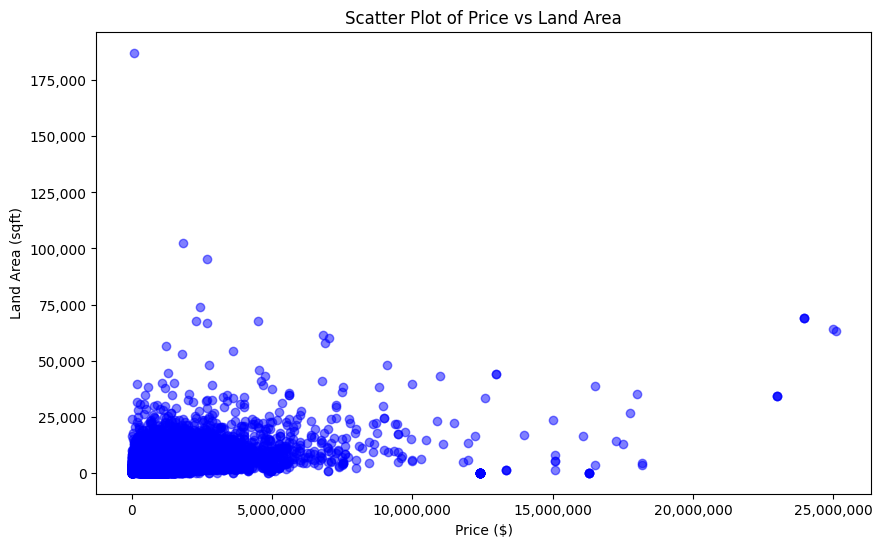

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['landarea'], alpha=0.5, color='blue')

# Labels and Title
plt.xlabel("Price ($)")
plt.ylabel("Land Area (sqft)")
plt.title("Scatter Plot of Price vs Land Area")

# Format both axis with commas for large numbers
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f"{int(y):,}"))

# Show the plot
plt.show()


## **12. Visualizing Price vs Area with adjusted window**

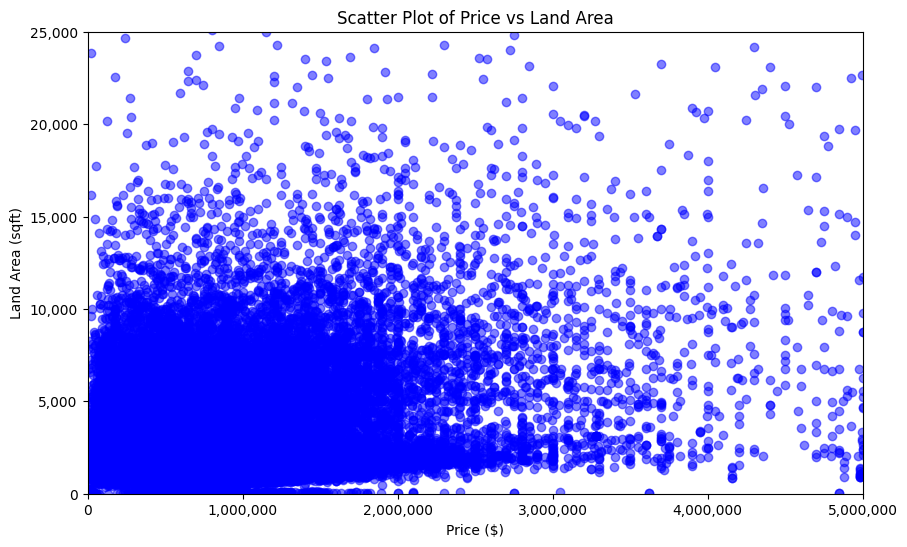

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['landarea'], alpha=0.5, color='blue')

# Labels and Title
plt.xlabel("Price ($)")
plt.ylabel("Land Area (sqft)")
plt.title("Scatter Plot of Price vs Land Area")

# Format x-axis and y-axis with commas for large numbers
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f"{int(y):,}"))

# Set x-axis and y-axis limits
plt.xlim(0, 5_000_000)
plt.ylim(0, 25_000)

# Show the plot
plt.show()


## **13. Visualizing Price vs Area in the IQR**

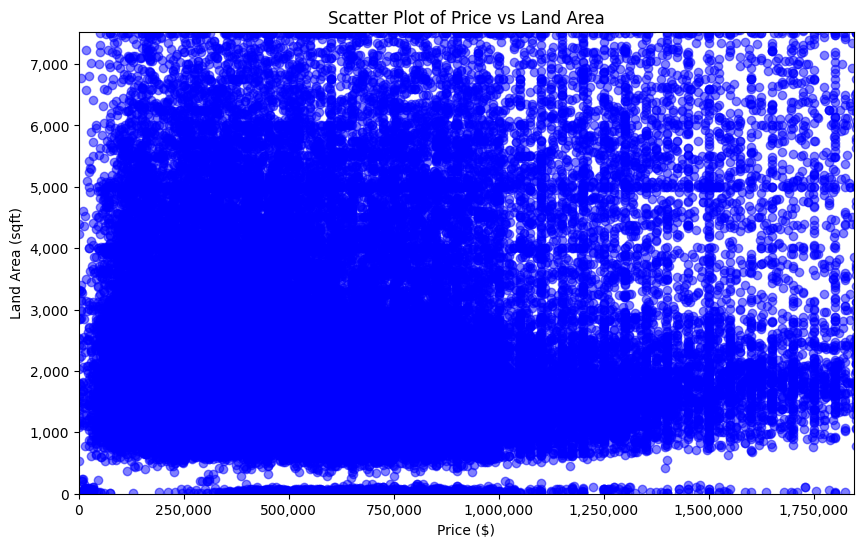

In [15]:
# Function to calculate IQR-based range
def iqr_range(series):
    Q1 = series.quantile(0.25)  # 25th percentile
    Q3 = series.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = max(0, Q1 - 1.5 * IQR)  # Ensure non-negative lower bound
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Compute IQR-based limits
x_min, x_max = iqr_range(df['price'])
y_min, y_max = iqr_range(df['landarea'])

plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['landarea'], alpha=0.5, color='blue')

# Labels and Title
plt.xlabel("Price ($)")
plt.ylabel("Land Area (sqft)")
plt.title("Scatter Plot of Price vs Land Area")

# Format x-axis and y-axis with commas for large numbers
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f"{int(y):,}"))

# Set x and y limits based on IQR
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Show the plot
plt.show()


## **14. Pie Charts of Number of Bathrooms**

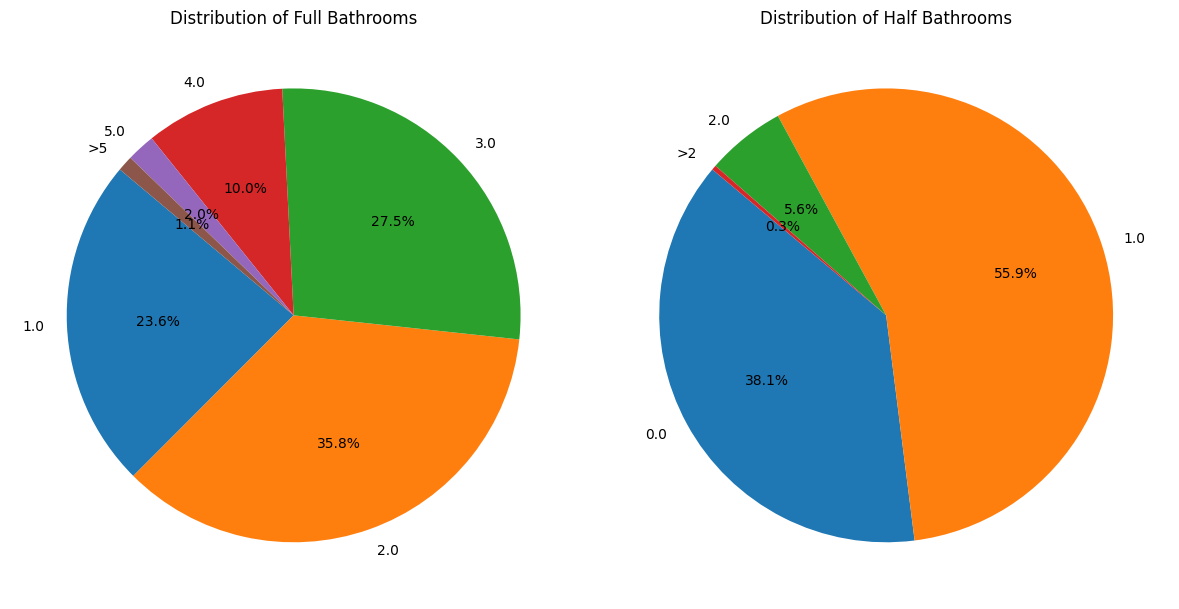

In [16]:
# Aggregate counts for unique values
bathroom_counts = df['bathrm'].value_counts()
half_bathroom_counts = df['hf_bathrm'].value_counts()

# Convert index to numeric type (ensure it's integers, not strings)
bathroom_counts.index = pd.to_numeric(bathroom_counts.index, errors='coerce')
half_bathroom_counts.index = pd.to_numeric(half_bathroom_counts.index, errors='coerce')

# Remove 0.0 from full bathroom counts
bathroom_counts = bathroom_counts[bathroom_counts.index != 0]

# Create new Series with grouped values
bathroom_counts_filtered = bathroom_counts[bathroom_counts.index <= 5].copy()  # Keep <= 5
bathroom_counts_filtered.loc[">5"] = bathroom_counts[bathroom_counts.index > 5].sum()  # Group > 5

half_bathroom_counts_filtered = half_bathroom_counts[half_bathroom_counts.index <= 2].copy()  # Keep <= 2
half_bathroom_counts_filtered.loc[">2"] = half_bathroom_counts[half_bathroom_counts.index > 2].sum()  # Group > 2

# Convert indices to strings for labeling
bathroom_counts_filtered.index = bathroom_counts_filtered.index.astype(str)
half_bathroom_counts_filtered.index = half_bathroom_counts_filtered.index.astype(str)

# Ensure proper numerical sorting, keeping '>5' and '>2' at the end
bathroom_counts_filtered = bathroom_counts_filtered.reindex(sorted(bathroom_counts_filtered.index, key=lambda x: float(x.replace('>','')) if x.replace('>','').replace('.','',1).isdigit() else float('inf')))
half_bathroom_counts_filtered = half_bathroom_counts_filtered.reindex(sorted(half_bathroom_counts_filtered.index, key=lambda x: float(x.replace('>','')) if x.replace('>','').replace('.','',1).isdigit() else float('inf')))

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for full bathrooms
axes[0].pie(bathroom_counts_filtered, labels=bathroom_counts_filtered.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title("Distribution of Full Bathrooms")

# Pie chart for half bathrooms
axes[1].pie(half_bathroom_counts_filtered, labels=half_bathroom_counts_filtered.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title("Distribution of Half Bathrooms")

# Show the pie charts
plt.tight_layout()
plt.show()

## **13. Histogram of Bedroom Counts**

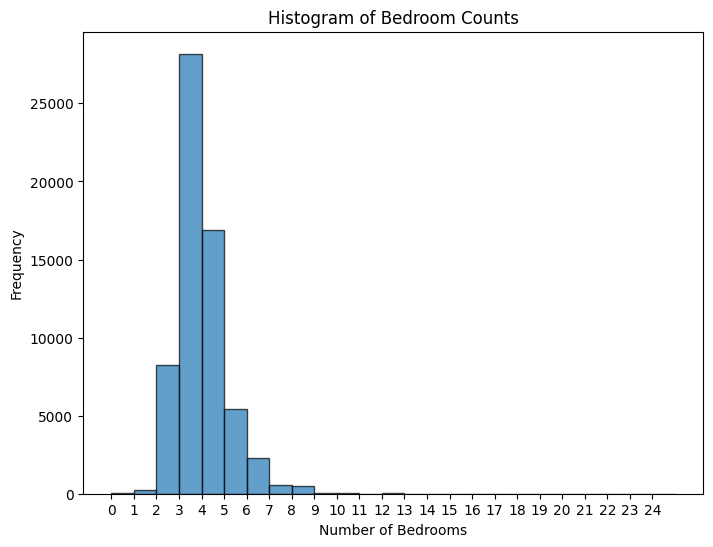

In [17]:
# Histogram for number of bedrooms
plt.figure(figsize=(8, 6))
plt.hist(df['bedrm'], bins=range(int(df['bedrm'].min()), int(df['bedrm'].max()) + 2), edgecolor='black', alpha=0.7)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Frequency")
plt.title("Histogram of Bedroom Counts")
plt.xticks(range(int(df['bedrm'].min()), int(df['bedrm'].max()) + 1))
plt.show()

## **14. Creating B+W Plots with Seaborn**

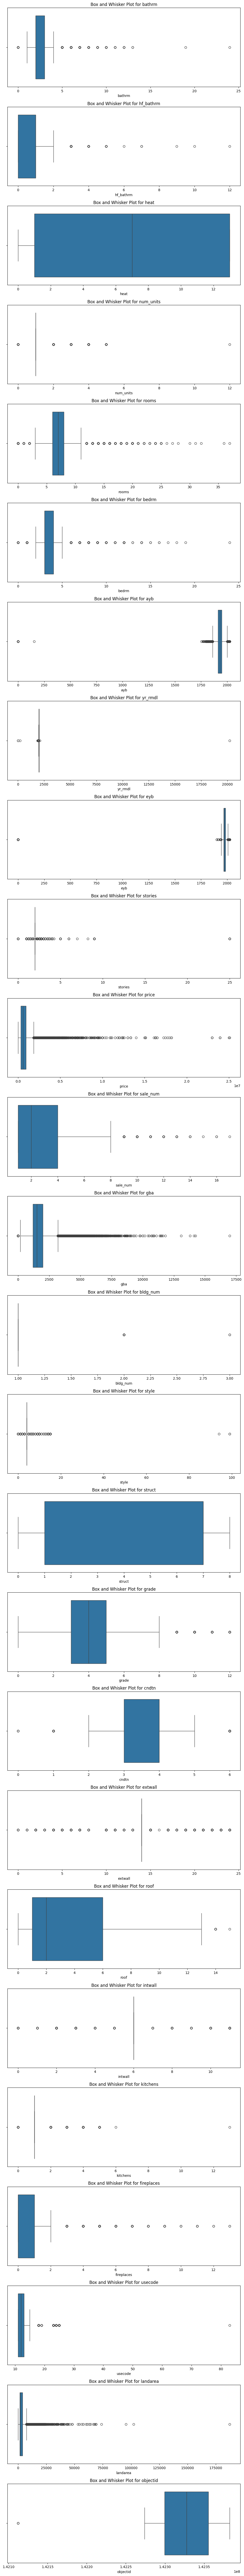

In [18]:
# Using Seaborn for individual box plots
fig, axes = plt.subplots(nrows=len(quantitative_columns), figsize=(10, len(quantitative_columns) * 4))
for ax, column in zip(axes, quantitative_columns):
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f"Box and Whisker Plot for {column}")
plt.tight_layout()
plt.show()

## **15. Computing the Correlation Matrix**

In [19]:
# Select only quantitative (numerical) columns
quantitative_columns = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = quantitative_columns.corr()

# Display correlation matrix
# print(correlation_matrix)

## **16. Plotting the Correlation Matrix**

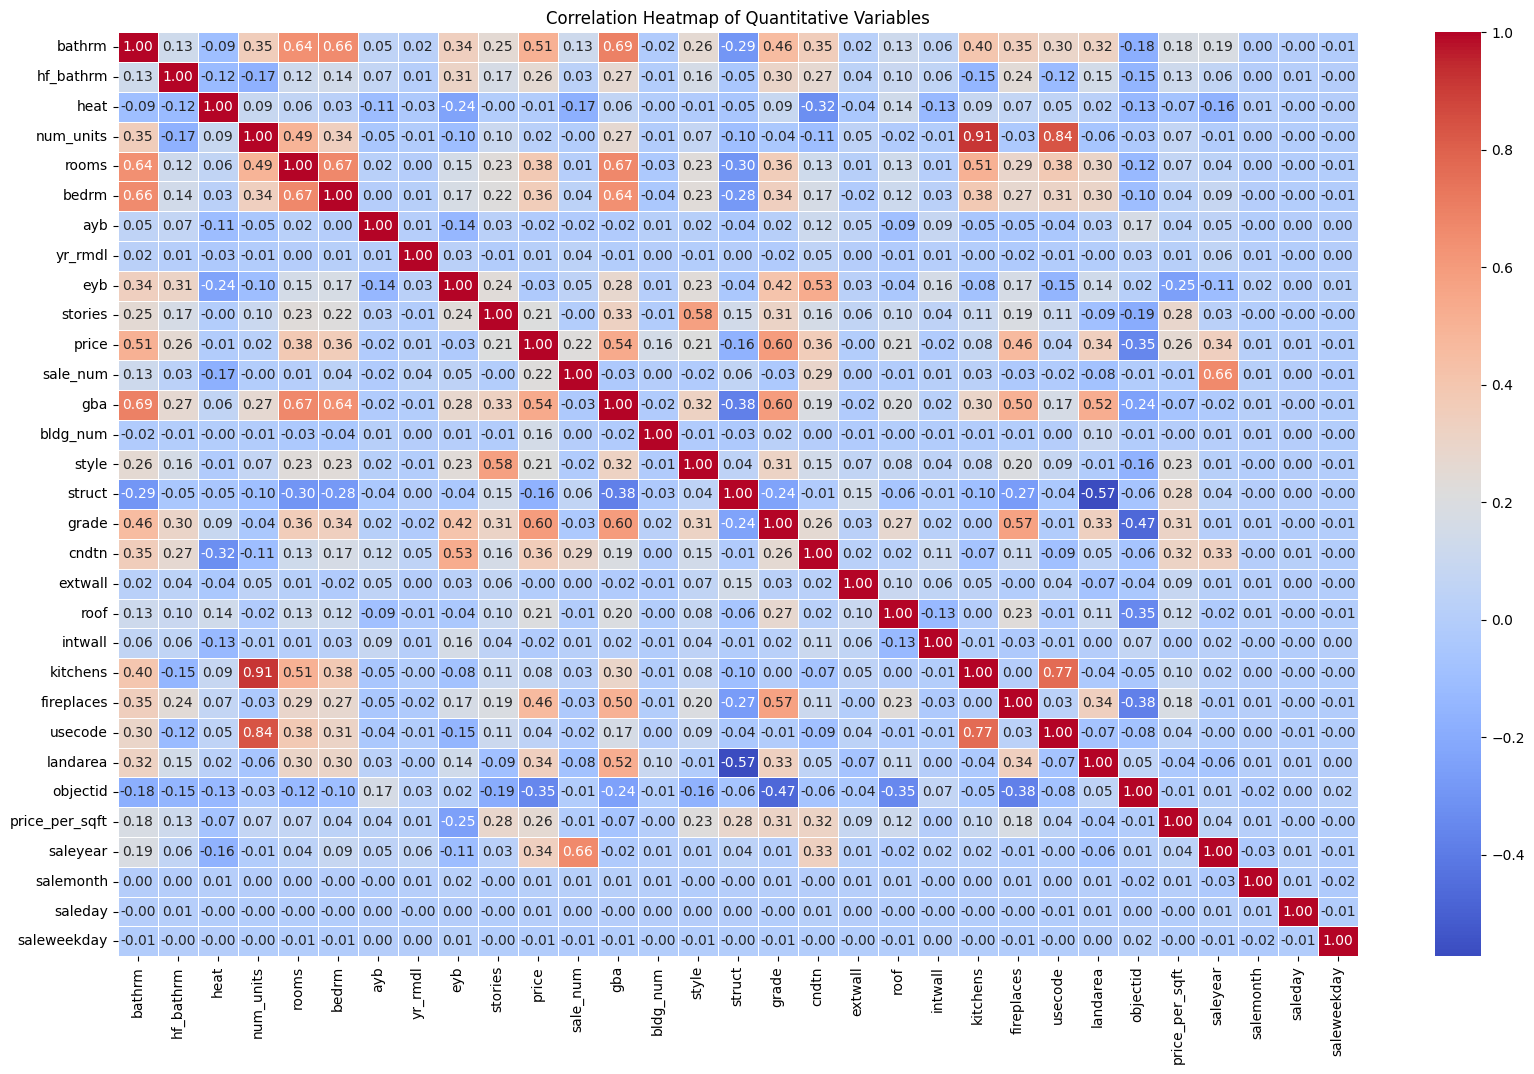

In [20]:
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Quantitative Variables")
plt.show()

## **Extract Basic Yearly Statistics**

In [21]:
yearly_stats = df.groupby('saleyear').agg({
    'price': ['mean', 'median', 'count'],  # Price statistics
    'salemonth': 'nunique',  # Number of months with sales per year
    'eyb': 'count'  # Count the number of properties with EYB for each year
}).reset_index()

# Rename columns for clarity
yearly_stats.columns = ['saleyear', 'avg_price', 'median_price', 'total_sales', 'active_months', 'total_eyb']

display(yearly_stats)  # Displays yearly stats

# determine where to write the csv output based on if colab is beling used
if is_colab():
    yearly_stats.to_csv(path+"yearly_stats.csv", index=False)
else:
    yearly_stats.to_csv("yearly_stats.csv", index=False)

print("\n--- Data Cleaning Complete! Saved as cleaned_house_prices.csv ---\n")

,saleyear,avg_price,median_price,total_sales,active_months,total_eyb
0,1900,"48,000.00","48,000.00",1,1,1
1,1979,"99,500.00","99,500.00",1,1,1
2,1982,"40,000.00","40,000.00",1,1,1
3,1986,"342,833.33","91,000.00",3,2,3
4,1987,"280,666.67","232,000.00",3,2,3
5,1988,"245,166.67","273,500.00",3,2,3
6,1989,"170,000.00","170,000.00",1,1,1
7,1990,"105,333.33","110,000.00",3,2,3
8,1991,"787,725.00","198,950.00",4,4,4
9,1992,"224,518.06","145,000.00",498,12,498



--- Data Cleaning Complete! Saved as cleaned_house_prices.csv ---



## Resale Tracking Attempt

In [22]:
ssl_counts = df['ssl'].value_counts()
multiple_sales_ssl = ssl_counts[ssl_counts > 1]

print(f"Properties appearing more than once (SSL count > 1): {len(multiple_sales_ssl)}")
print(multiple_sales_ssl.head(10))  # Display some SSLs with multiple occurrences


Properties appearing more than once (SSL count > 1): 38
ssl
2517    0046    3
1270    0826    3
1295    0260    2
6004    0003    2
6004    0005    2
0989    0071    2
2660    0218    2
1442    0063    2
2258    0047    2
1366    0012    2
Name: count, dtype: int64


In [23]:
ssl_sample = df[df['ssl'] == multiple_sales_ssl.index[0]]  # Choose an SSL that appears more than once
ssl_sample = ssl_sample[['ssl', 'saledate', 'price', 'eyb', 'usecode']]  # Display key resale attributes
ssl_sample = ssl_sample.sort_values(by='saledate')

display(ssl_sample)


,ssl,saledate,price,eyb,usecode
39950,2517 0046,2016-10-21 04:00:00+00:00,"23,000,000.00",2007,12
39951,2517 0046,2016-10-21 04:00:00+00:00,"23,000,000.00",2007,12
39952,2517 0046,2016-10-21 04:00:00+00:00,"23,000,000.00",2021,12


In [24]:
df['property_id'] = df['ssl'].astype(str) + "_" + df['bldg_num'].astype(str)

# Count how many times each property has been sold
resale_counts = df['property_id'].value_counts()

# Filter for properties sold more than once
resold_properties = resale_counts[resale_counts > 1]

print(f"Total properties resold: {len(resold_properties)}")
print(resold_properties.head(10))  # Display top 10 resold properties


Total properties resold: 0
Series([], Name: count, dtype: int64)


## Location Data Tracking

In [35]:
df_location_data.columns = df_location_data.columns.str.lower().str.replace(" ", "_")
display(df_location_data.head(10))

,x,y,objectid,mar_id,address,address_number,address_number_suffix,street_name,street_type,quadrant,zipcode,city,state,country,x_coordinate,y_coordinate,latitude,longitude,address_type,status,routeid,blockkey,subblockkey,ward,metadata_id,national_grid,has_ssl,has_place_name,has_condo,has_residential_unit,street_view_url,residential_type,placement,ssl_alignment,building,ssl,square,suffix,lot,multiple_land_ssl,grid_direction,housing_unit_count,residential_unit_count,before_date,before_date_source,begin_date,begin_date_source,first_known_date,first_known_date_source,created_date,created_user,last_edited_date,last_edited_user,se_anno_cad_data,smd,anc
0,"-8,568,814.41","4,699,513.30",76485911,53054,2007 TRENTON PLACE SE,"2,007.00",NaN,TRENTON,PLACE,SE,"20,020.00",WASHINGTON,DC,UNITED STATES,"402,173.11","130,814.77",38.85,-76.97,ADDRESS,ACTIVE,13086512,fcc2902237670f79fd0c30c4961fe21a,fcc2902237670f79fd0c30c4961fe21a,Ward 8,15951203,18S UJ 28605 01444,N,N,N,N,http://maps.google.com/maps?z=16&layer=c&cbll=...,RESIDENTIAL,CENTER OF BUILDING,ALIGNS WELL,NaN,5899 0072,5899,NaN,0072,NaN,EAST,1,0.00,NaN,NaN,1999/01/01 00:00:00+00,OP HISTORIC BUILDING DATA,NaN,NaN,2005/05/12 00:00:00+00,Baker/Arcbridge,NaN,SYSTEM,NaN,SMD 8E02,ANC 8E
1,"-8,570,068.17","4,707,878.32",76485912,68638,1302 TRINIDAD AVENUE NE,"1,302.00",NaN,TRINIDAD,AVENUE,NE,"20,002.00",WASHINGTON,DC,UNITED STATES,"401,194.41","137,308.68",38.90,-76.99,ADDRESS,ACTIVE,12086642,5cd350f7c73565a6f74f5eb14e25db45,5b4814d88724d2c906bc86d8e42affb2,Ward 5,15853298,18S UJ 27768 07958,N,N,N,N,http://maps.google.com/maps?z=16&layer=c&cbll=...,RESIDENTIAL,CENTER OF BUILDING,ALIGNS WELL,NaN,4063 0087,4063,NaN,0087,NaN,NORTH,1,0.00,NaN,NaN,1924/09/16 00:00:01+00,BUILDING PERMIT,NaN,NaN,2005/05/12 00:00:00+00,Baker/Arcbridge,NaN,SYSTEM,NaN,SMD 5D03,ANC 5D
2,"-8,575,047.74","4,717,261.93",76485913,257391,1327 UNDERWOOD STREET NW,"1,327.00",NaN,UNDERWOOD,STREET,NW,"20,012.00",WASHINGTON,DC,UNITED STATES,"397,316.83","144,587.65",38.97,-77.03,ADDRESS,ACTIVE,11087422,c58ece6c0a1197f3d49c7d4a6bf58224,95c12cb6f733fa0230362ddc90624965,Ward 4,15907930,18S UJ 24051 15320,N,N,N,N,http://maps.google.com/maps?z=16&layer=c&cbll=...,RESIDENTIAL,CENTER OF BUILDING,ALIGNS WELL,NaN,2785 0052,2785,NaN,0052,NaN,WEST,1,0.00,NaN,NaN,1940/10/04 00:00:01+00,BUILDING PERMIT,NaN,NaN,2005/05/12 00:00:00+00,Baker/Arcbridge,NaN,SYSTEM,NaN,SMD 4A04,ANC 4A
3,"-8,574,002.42","4,718,808.20",76485914,251160,511 BRUMMEL COURT NW,511.00,NaN,BRUMMEL,COURT,NW,"20,012.00",WASHINGTON,DC,UNITED STATES,"398,130.87","145,786.18",38.98,-77.02,ADDRESS,ACTIVE,11018622,a5f5ff0dda8bb1bfba7cc2769e60f98f,a5f5ff0dda8bb1bfba7cc2769e60f98f,Ward 4,15959687,18S UJ 24892 16501,N,N,N,N,http://maps.google.com/maps?z=16&layer=c&cbll=...,RESIDENTIAL,CENTER OF BUILDING,ALIGNS WELL,NaN,NaN,NaN,NaN,nan,NaN,WEST,1,0.00,NaN,NaN,1980/01/01 00:00:00+00,OP HISTORIC BUILDING DATA,NaN,NaN,2005/05/12 00:00:00+00,Baker/Arcbridge,2024/12/31 12:40:27+00,DLUSER,NaN,SMD 4B01,ANC 4B
4,"-8,581,997.10","4,714,069.82",76485915,266927,4712 ALTON PLACE NW,"4,712.00",NaN,ALTON,PLACE,NW,"20,016.00",WASHINGTON,DC,UNITED STATES,"391,904.38","142,116.05",38.95,-77.09,ADDRESS,ACTIVE,11010072,a993c626df78a7581d377b3d6e91033b,a993c626df78a7581d377b3d6e91033b,Ward 3,15917315,18S UJ 18586 12968,N,N,N,N,http://maps.google.com/maps?z=16&layer=c&cbll=...,RESIDENTIAL,CENTER OF BUILDING,ALIGNS WELL,NaN,1534 0018,1534,NaN,0018,NaN,WEST,1,0.00,NaN,NaN,1940/03/15 00:00:01+00,BUILDING PERMIT,NaN,NaN,2005/05/12 00:00:00+00,Baker/Arcbridge,NaN,SYSTEM,NaN,SMD 3E06,ANC 3E
5,"-8,577,493.16","4,707,432.56",76485916,274043,2422 I STREET NW,"2,422.00",NaN,I,STREET,NW,"20,037.00",WASHINGTON,DC,UNITED STATES,"395,408.70","136,963.99",38.90,-77.05,ADDRESS,ACTIVE,11047772,2dbfd9c1c7aaf96ace316af0da973370,cca04d2c9d7f2fa9f14c678ec08b0eb2,Ward 2,15924226,18S UJ 21976 07740,N,N,N,N,http://maps.google.com/maps?z=16&layer=c&cbll=...,RESIDENTIAL,CENTER OF BUILDING,ALIGNS WELL,NaN,0029 0809,0029,NaN,0809,NaN,

In [26]:
# Extract last four digits and assign to 'LOT' column
df_location_data['lot'] = df_location_data['ssl'].astype(str).str[-4:].copy()
# keep a constant of the data so it is not lost
DF_LOCATION_DATA_RAW = df_location_data.copy()
display(df_location_data.head(10))

,X,Y,OBJECTID,MAR_ID,ADDRESS,ADDRESS_NUMBER,ADDRESS_NUMBER_SUFFIX,STREET_NAME,STREET_TYPE,QUADRANT,ZIPCODE,CITY,STATE,COUNTRY,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,ADDRESS_TYPE,STATUS,ROUTEID,BLOCKKEY,SUBBLOCKKEY,WARD,METADATA_ID,NATIONAL_GRID,HAS_SSL,HAS_PLACE_NAME,HAS_CONDO,HAS_RESIDENTIAL_UNIT,STREET_VIEW_URL,RESIDENTIAL_TYPE,PLACEMENT,SSL_ALIGNMENT,BUILDING,SSL,SQUARE,SUFFIX,LOT,MULTIPLE_LAND_SSL,GRID_DIRECTION,HOUSING_UNIT_COUNT,RESIDENTIAL_UNIT_COUNT,BEFORE_DATE,BEFORE_DATE_SOURCE,BEGIN_DATE,BEGIN_DATE_SOURCE,FIRST_KNOWN_DATE,FIRST_KNOWN_DATE_SOURCE,CREATED_DATE,CREATED_USER,LAST_EDITED_DATE,LAST_EDITED_USER,SE_ANNO_CAD_DATA,SMD,ANC
0,"-8,568,814.41","4,699,513.30",76485911,53054,2007 TRENTON PLACE SE,"2,007.00",NaN,TRENTON,PLACE,SE,"20,020.00",WASHINGTON,DC,UNITED STATES,"402,173.11","130,814.77",38.85,-76.97,ADDRESS,ACTIVE,13086512,fcc2902237670f79fd0c30c4961fe21a,fcc2902237670f79fd0c30c4961fe21a,Ward 8,15951203,18S UJ 28605 01444,N,N,N,N,http://maps.google.com/maps?z=16&layer=c&cbll=...,RESIDENTIAL,CENTER OF BUILDING,ALIGNS WELL,NaN,5899 0072,5899,NaN,0072,NaN,EAST,1,0.00,NaN,NaN,1999/01/01 00:00:00+00,OP HISTORIC BUILDING DATA,NaN,NaN,2005/05/12 00:00:00+00,Baker/Arcbridge,NaN,SYSTEM,NaN,SMD 8E02,ANC 8E
1,"-8,570,068.17","4,707,878.32",76485912,68638,1302 TRINIDAD AVENUE NE,"1,302.00",NaN,TRINIDAD,AVENUE,NE,"20,002.00",WASHINGTON,DC,UNITED STATES,"401,194.41","137,308.68",38.90,-76.99,ADDRESS,ACTIVE,12086642,5cd350f7c73565a6f74f5eb14e25db45,5b4814d88724d2c906bc86d8e42affb2,Ward 5,15853298,18S UJ 27768 07958,N,N,N,N,http://maps.google.com/maps?z=16&layer=c&cbll=...,RESIDENTIAL,CENTER OF BUILDING,ALIGNS WELL,NaN,4063 0087,4063,NaN,0087,NaN,NORTH,1,0.00,NaN,NaN,1924/09/16 00:00:01+00,BUILDING PERMIT,NaN,NaN,2005/05/12 00:00:00+00,Baker/Arcbridge,NaN,SYSTEM,NaN,SMD 5D03,ANC 5D
2,"-8,575,047.74","4,717,261.93",76485913,257391,1327 UNDERWOOD STREET NW,"1,327.00",NaN,UNDERWOOD,STREET,NW,"20,012.00",WASHINGTON,DC,UNITED STATES,"397,316.83","144,587.65",38.97,-77.03,ADDRESS,ACTIVE,11087422,c58ece6c0a1197f3d49c7d4a6bf58224,95c12cb6f733fa0230362ddc90624965,Ward 4,15907930,18S UJ 24051 15320,N,N,N,N,http://maps.google.com/maps?z=16&layer=c&cbll=...,RESIDENTIAL,CENTER OF BUILDING,ALIGNS WELL,NaN,2785 0052,2785,NaN,0052,NaN,WEST,1,0.00,NaN,NaN,1940/10/04 00:00:01+00,BUILDING PERMIT,NaN,NaN,2005/05/12 00:00:00+00,Baker/Arcbridge,NaN,SYSTEM,NaN,SMD 4A04,ANC 4A
3,"-8,574,002.42","4,718,808.20",76485914,251160,511 BRUMMEL COURT NW,511.00,NaN,BRUMMEL,COURT,NW,"20,012.00",WASHINGTON,DC,UNITED STATES,"398,130.87","145,786.18",38.98,-77.02,ADDRESS,ACTIVE,11018622,a5f5ff0dda8bb1bfba7cc2769e60f98f,a5f5ff0dda8bb1bfba7cc2769e60f98f,Ward 4,15959687,18S UJ 24892 16501,N,N,N,N,http://maps.google.com/maps?z=16&layer=c&cbll=...,RESIDENTIAL,CENTER OF BUILDING,ALIGNS WELL,NaN,NaN,NaN,NaN,nan,NaN,WEST,1,0.00,NaN,NaN,1980/01/01 00:00:00+00,OP HISTORIC BUILDING DATA,NaN,NaN,2005/05/12 00:00:00+00,Baker/Arcbridge,2024/12/31 12:40:27+00,DLUSER,NaN,SMD 4B01,ANC 4B
4,"-8,581,997.10","4,714,069.82",76485915,266927,4712 ALTON PLACE NW,"4,712.00",NaN,ALTON,PLACE,NW,"20,016.00",WASHINGTON,DC,UNITED STATES,"391,904.38","142,116.05",38.95,-77.09,ADDRESS,ACTIVE,11010072,a993c626df78a7581d377b3d6e91033b,a993c626df78a7581d377b3d6e91033b,Ward 3,15917315,18S UJ 18586 12968,N,N,N,N,http://maps.google.com/maps?z=16&layer=c&cbll=...,RESIDENTIAL,CENTER OF BUILDING,ALIGNS WELL,NaN,1534 0018,1534,NaN,0018,NaN,WEST,1,0.00,NaN,NaN,1940/03/15 00:00:01+00,BUILDING PERMIT,NaN,NaN,2005/05/12 00:00:00+00,Baker/Arcbridge,NaN,SYSTEM,NaN,SMD 3E06,ANC 3E
5,"-8,577,493.16","4,707,432.56",76485916,274043,2422 I STREET NW,"2,422.00",NaN,I,STREET,NW,"20,037.00",WASHINGTON,DC,UNITED STATES,"395,408.70","136,963.99",38.90,-77.05,ADDRESS,ACTIVE,11047772,2dbfd9c1c7aaf96ace316af0da973370,cca04d2c9d7f2fa9f14c678ec08b0eb2,Ward 2,15924226,18S UJ 21976 07740,N,N,N,N,http://maps.google.com/maps?z=16&layer=c&cbll=...,RESIDENTIAL,CENTER OF BUILDING,ALIGNS WELL,NaN,0029 0809,0029,NaN,0809,NaN,

In [30]:
# Ensure 'ssl' column is treated as a string
df['ssl'] = df['ssl'].astype(str)

# Create new columns based on the structure of 'ssl'
df['square'] = df['ssl'].str[:4]   # First 4 characters
df['suffix'] = df['ssl'].str[4:6]  # Next 2 characters
df['lot'] = df['ssl'].str[-4:]     # Last 4 characters

# Replace empty spaces "  " with NaN in the 'suffix' column
df['suffix'] = df['suffix'].replace("  ", np.nan)

# Display the updated DataFrame
df.head(10)

,ssl,bathrm,hf_bathrm,heat,heat_d,ac,num_units,rooms,bedrm,ayb,yr_rmdl,eyb,stories,saledate,price,qualified,sale_num,gba,bldg_num,style,style_d,struct,struct_d,grade,grade_d,cndtn,cndtn_d,extwall,extwall_d,roof,roof_d,intwall,intwall_d,kitchens,fireplaces,usecode,landarea,gis_last_mod_dttm,objectid,price_per_sqft,saleyear,salemonth,saleday,saletime,saleweekday,property_id,square,suffix,lot
0,0016 0099,3.00,1.00,7.00,Warm Cool,Y,1.00,6.00,2.00,"1,957.00","2,003.00",1981,2.00,2017-07-19 04:00:00+00:00,"1,340,000.00",Q,2,1572,1,4.00,2 Story,6.00,Row End,5.00,Good Quality,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,2.00,2.00,11,1549,2025/01/17 10:16:46+00,142112268,865.07,2017,7,19,04:00:00,2,0016 0099_1,0016,NaN,0099
1,0016 0106,3.00,1.00,8.00,Ht Pump,Y,1.00,10.00,3.00,"1,959.00","2,015.00",1998,2.00,2022-08-25 04:00:00+00:00,"1,655,000.00",Q,4,1530,1,4.00,2 Story,7.00,Row Inside,6.00,Very Good,5.00,Very Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,2.00,11,1856,2025/01/17 10:16:46+00,142112269,891.70,2022,8,25,04:00:00,3,0016 0106_1,0016,NaN,0106
2,0016 0107,3.00,1.00,7.00,Warm Cool,Y,1.00,7.00,3.00,"2,002.00",NaN,2009,2.00,2004-10-20 04:00:00+00:00,"920,000.00",Q,1,1600,1,4.00,2 Story,1.00,Single,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,1.00,12,1487,2025/01/17 10:16:46+00,142112270,618.70,2004,10,20,04:00:00,2,0016 0107_1,0016,NaN,0107
5,0016 0110,1.00,1.00,7.00,Warm Cool,Y,1.00,5.00,2.00,"1,924.00","2,005.00",1974,2.00,2020-08-14 04:00:00+00:00,"845,000.00",Q,3,984,1,4.00,2 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,1.00,11,730,2025/01/17 10:16:46+00,142273985,"1,157.53",2020,8,14,04:00:00,4,0016 0110_1,0016,NaN,0110
6,0016 0800,2.00,0.00,8.00,Ht Pump,Y,1.00,6.00,2.00,"1,925.00","2,019.00",1974,2.00,2019-03-08 05:00:00+00:00,"975,000.00",Q,3,1472,1,4.00,2 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,2.00,11,1598,2025/01/17 10:16:46+00,142273986,610.14,2019,3,8,05:00:00,4,0016 0800_1,0016,NaN,0800
7,0016 0801,1.00,1.00,7.00,Warm Cool,Y,2.00,7.00,4.00,"1,925.00","2,006.00",1974,2.00,2022-02-15 05:00:00+00:00,"1,150,000.00",Q,3,1536,1,4.00,2 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,2.00,11,1598,2025/01/17 10:16:46+00,142273987,719.65,2022,2,15,05:00:00,1,0016 0801_1,0016,NaN,0801
8,0016 0803,3.00,1.00,1.00,Forced Air,Y,2.00,5.00,4.00,"1,959.00","2,011.00",1985,2.00,2009-05-20 04:00:00+00:00,"941,000.00",Q,1,1530,1,4.00,2 Story,7.00,Row Inside,6.00,Very Good,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,2.00,2.00,24,2124,2025/01/17 10:16:46+00,142273988,443.03,2009,5,20,04:00:00,2,0016 0803_1,0016,NaN,0803
10,0016 0836,2.00,2.00,1.00,Forced Air,Y,1.00,7.00,3.00,"1,948.00","2,008.00",1976,3.00,1996-06-11 04:00:00+00:00,"375,000.00",U,1,1792,1,7.00,3 Story,7.00,Row Inside,5.00,Good Quality,4.00,Good,21.00,Brick/Stucco,2.00,Built Up,6.00,Hardwood,1.00,1.00,11,1044,2025/01/17 10:16:46+00,142273990,359.20,1996,6,11,04:00:00,1,0016 0836_1,0016,NaN,0836
11,0016 0840,1.00,0.00,7.00,Warm Cool,Y,1.00,4.00,2.00,"1,899.00","2,010.00",1974,2.00,2010-01-22 05:00:00+00:00,"664,500.00",Q,1,984,1,4.00,2 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,1.00,11,681,2025/01/17 10:16:46+00,142273991,975.77,2010,1,22,05:00:00,4,0016 0840_1,0016,NaN,0840
12,0016 0841,1.00,2.00,7.00,Warm Cool,Y,1.00,7.00,2.00,"1,954.00","2,012.00",1976,3.00,2006-07-07 04:00:00+00:00,"880,000.00",Q,1,1820,1,7.00,3 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,1.00,11,691,2025/01/17 10:16:46+00,142273992,"1,273.52",2006,7,7,04:00:00,4,0016 0841_1,0016,NaN,0841


In [38]:
# Perform a merge based on matching 'square', 'suffix', and 'lot' columns
df = df.merge(df_location_data[['square', 'suffix', 'lot', 'quadrant', 'ward']], on=['square', 'suffix', 'lot'], how='left')

display(df.head(10))

,ssl,bathrm,hf_bathrm,heat,heat_d,ac,num_units,rooms,bedrm,ayb,yr_rmdl,eyb,stories,saledate,price,qualified,sale_num,gba,bldg_num,style,style_d,struct,struct_d,grade,grade_d,cndtn,cndtn_d,extwall,extwall_d,roof,roof_d,intwall,intwall_d,kitchens,fireplaces,usecode,landarea,gis_last_mod_dttm,objectid,price_per_sqft,saleyear,salemonth,saleday,saletime,saleweekday,property_id,square,suffix,lot,quadrant_x,ward_x,quadrant_y,ward_y,quadrant,ward
0,0016 0099,3.00,1.00,7.00,Warm Cool,Y,1.00,6.00,2.00,"1,957.00","2,003.00",1981,2.00,2017-07-19 04:00:00+00:00,"1,340,000.00",Q,2,1572,1,4.00,2 Story,6.00,Row End,5.00,Good Quality,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,2.00,2.00,11,1549,2025/01/17 10:16:46+00,142112268,865.07,2017,7,19,04:00:00,2,0016 0099_1,0016,NaN,0099,NW,Ward 2,NW,Ward 2,NW,Ward 2
1,0016 0106,3.00,1.00,8.00,Ht Pump,Y,1.00,10.00,3.00,"1,959.00","2,015.00",1998,2.00,2022-08-25 04:00:00+00:00,"1,655,000.00",Q,4,1530,1,4.00,2 Story,7.00,Row Inside,6.00,Very Good,5.00,Very Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,2.00,11,1856,2025/01/17 10:16:46+00,142112269,891.70,2022,8,25,04:00:00,3,0016 0106_1,0016,NaN,0106,NW,Ward 2,NW,Ward 2,NW,Ward 2
2,0016 0107,3.00,1.00,7.00,Warm Cool,Y,1.00,7.00,3.00,"2,002.00",NaN,2009,2.00,2004-10-20 04:00:00+00:00,"920,000.00",Q,1,1600,1,4.00,2 Story,1.00,Single,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,1.00,12,1487,2025/01/17 10:16:46+00,142112270,618.70,2004,10,20,04:00:00,2,0016 0107_1,0016,NaN,0107,NW,Ward 2,NW,Ward 2,NW,Ward 2
3,0016 0110,1.00,1.00,7.00,Warm Cool,Y,1.00,5.00,2.00,"1,924.00","2,005.00",1974,2.00,2020-08-14 04:00:00+00:00,"845,000.00",Q,3,984,1,4.00,2 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,1.00,11,730,2025/01/17 10:16:46+00,142273985,"1,157.53",2020,8,14,04:00:00,4,0016 0110_1,0016,NaN,0110,NW,Ward 2,NW,Ward 2,NW,Ward 2
4,0016 0800,2.00,0.00,8.00,Ht Pump,Y,1.00,6.00,2.00,"1,925.00","2,019.00",1974,2.00,2019-03-08 05:00:00+00:00,"975,000.00",Q,3,1472,1,4.00,2 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,2.00,11,1598,2025/01/17 10:16:46+00,142273986,610.14,2019,3,8,05:00:00,4,0016 0800_1,0016,NaN,0800,NW,Ward 2,NW,Ward 2,NW,Ward 2
5,0016 0801,1.00,1.00,7.00,Warm Cool,Y,2.00,7.00,4.00,"1,925.00","2,006.00",1974,2.00,2022-02-15 05:00:00+00:00,"1,150,000.00",Q,3,1536,1,4.00,2 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,2.00,11,1598,2025/01/17 10:16:46+00,142273987,719.65,2022,2,15,05:00:00,1,0016 0801_1,0016,NaN,0801,NW,Ward 2,NW,Ward 2,NW,Ward 2
6,0016 0803,3.00,1.00,1.00,Forced Air,Y,2.00,5.00,4.00,"1,959.00","2,011.00",1985,2.00,2009-05-20 04:00:00+00:00,"941,000.00",Q,1,1530,1,4.00,2 Story,7.00,Row Inside,6.00,Very Good,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,2.00,2.00,24,2124,2025/01/17 10:16:46+00,142273988,443.03,2009,5,20,04:00:00,2,0016 0803_1,0016,NaN,0803,NW,Ward 2,NW,Ward 2,NW,Ward 2
7,0016 0836,2.00,2.00,1.00,Forced Air,Y,1.00,7.00,3.00,"1,948.00","2,008.00",1976,3.00,1996-06-11 04:00:00+00:00,"375,000.00",U,1,1792,1,7.00,3 Story,7.00,Row Inside,5.00,Good Quality,4.00,Good,21.00,Brick/Stucco,2.00,Built Up,6.00,Hardwood,1.00,1.00,11,1044,2025/01/17 10:16:46+00,142273990,359.20,1996,6,11,04:00:00,1,0016 0836_1,0016,NaN,0836,NW,Ward 2,NW,Ward 2,NW,Ward 2
8,0016 0840,1.00,0.00,7.00,Warm Cool,Y,1.00,4.00,2.00,"1,899.00","2,010.00",1974,2.00,2010-01-22 05:00:00+00:00,"664,500.00",Q,1,984,1,4.00,2 Story,7.00,Row Inside,4.00,Above Average,4.00,Good,14.00,Common Brick,2.00,Built Up,6.00,Hardwood,1.00,1.00,11,681,2025/01/17 10:16:46+00,142273991,975.77,2010,1,22,05:00:00,4,0016 0840_1,0016,NaN,0840,NW,Ward 2,NW,Ward 2,NW,Ward 2
9,0016 0841,1.00,2.00,7.00,Warm Cool,Y,1.00,7.00,2.00,"1,954.00","2,012.00",1976,3.00,2006-07-07 04:00:00+00:00,"880,000.00",Q,1,1820,1,7.00,3 Story,7.00,Row Inside,4.00,Above Average,4.0

In [40]:
# check the shape of df
rows, cols = df.shape
print(f"\nDataset contains {rows} rows and {cols} columns.\n")


Dataset contains 69286 rows and 55 columns.



I have started trying to evaluate the data based on location... I need to clean it up and make sure everything is accurate. For some reason there is a lot of NaN values, which would make trying to take insights from location data very

KeyError: False

## **17. Completion Message**

In [ ]:
print("\n--- Data Preprocessing Completed! ---\n")